In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import time
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV 
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
%matplotlib inline

In [2]:
df = pd.read_csv('./sample_data/iris.csv')

# Exploratory Data Analysis

In [3]:
# get info for continuous variables
df.describe()

,sepal.length,sepal.width,petal.length,petal.width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [4]:
df.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [5]:
# get count of samples for each variety
df.groupby('variety').count()

,sepal.length,sepal.width,petal.length,petal.width
variety,,,,
Setosa,50,50,50,50
Versicolor,50,50,50,50
Virginica,50,50,50,50


In [6]:
# check if there are any null values
df.isnull().sum()

sepal.length    0
sepal.width     0
petal.length    0
petal.width     0
variety         0
dtype: int64

# Data Visualization


#### Plot features using histogram

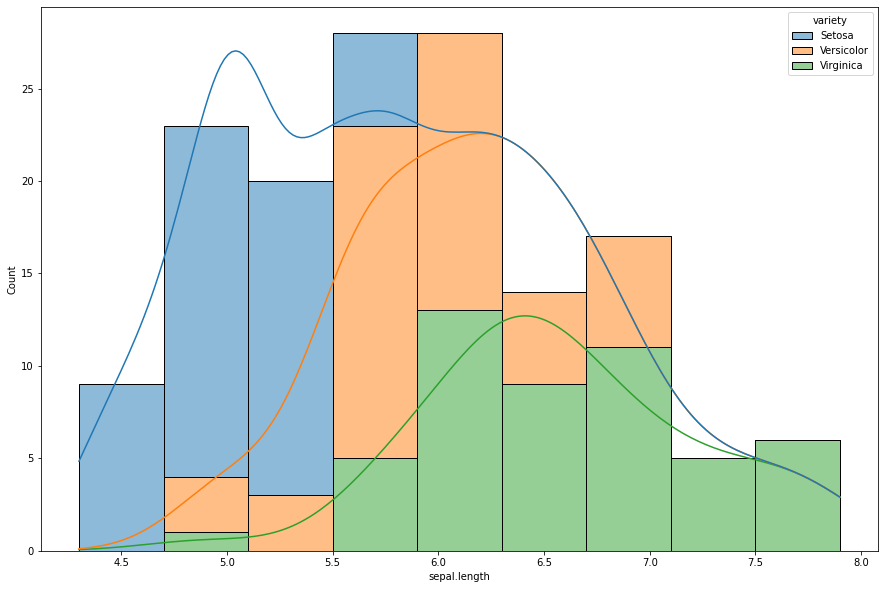

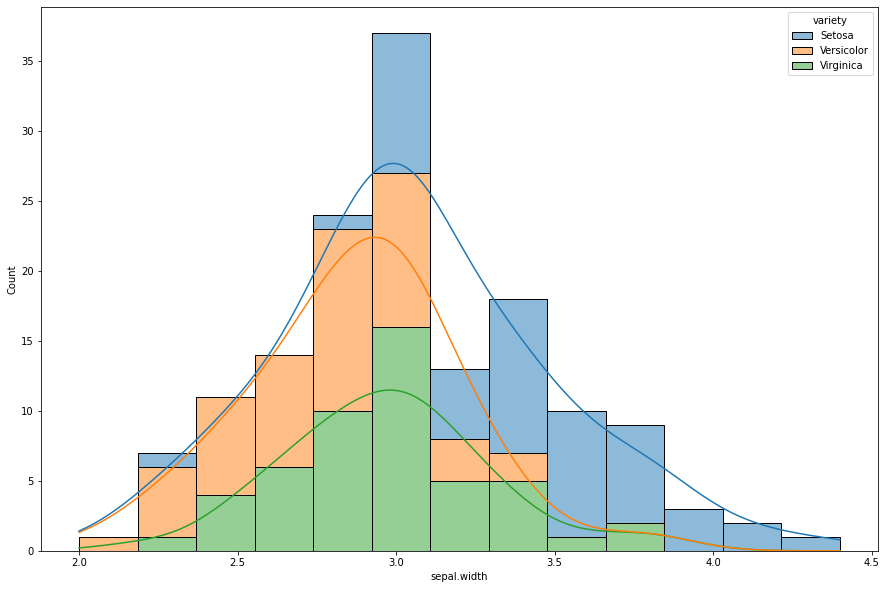

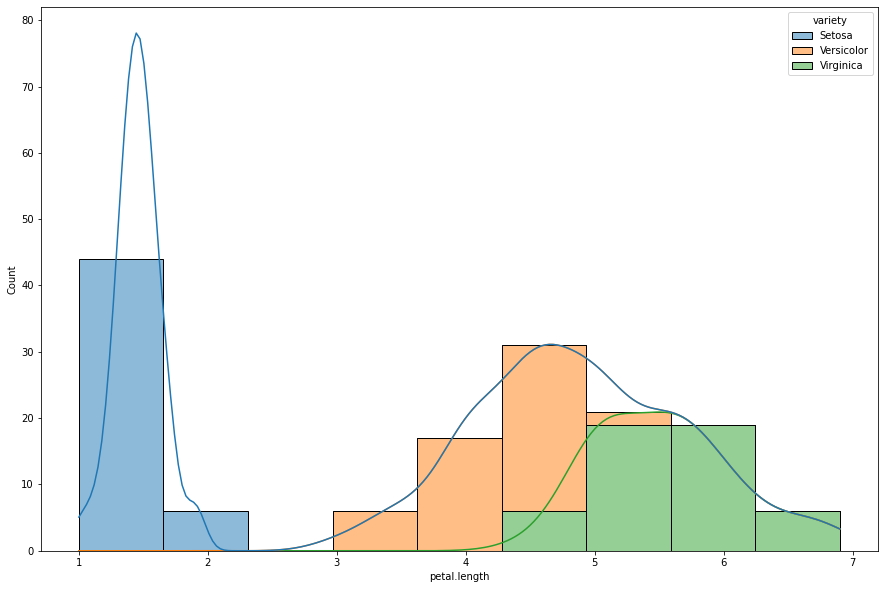

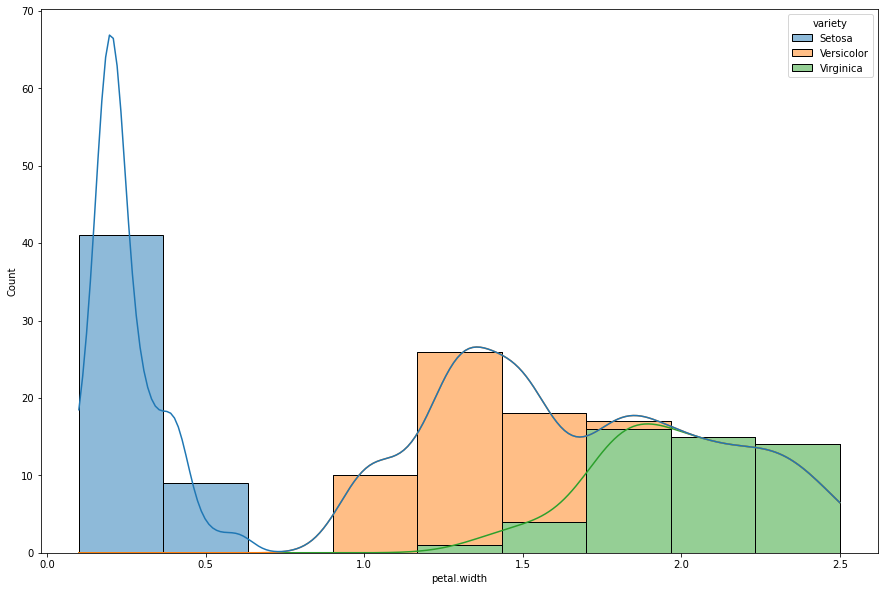

In [7]:
# plot data of each feature for all categories
# helps in observing the data distribution
for i in ['sepal.length','sepal.width', 'petal.length', 'petal.width']:
  plt.figure(figsize = (15,10))
  sns.histplot(data=df, x=i, multiple="stack", hue="variety", kde=True)
  plt.show()

#### Count of samples for each category

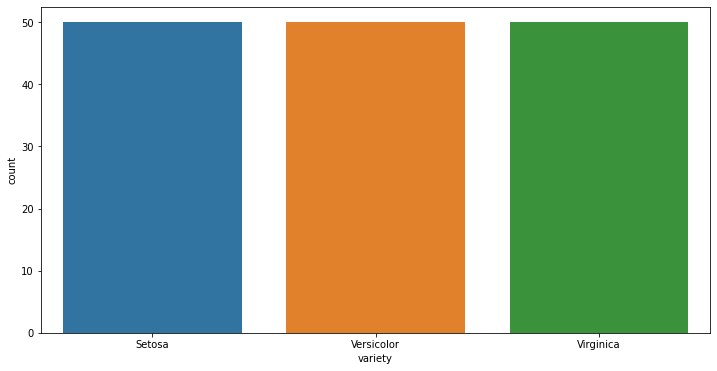

In [8]:
plt.figure(figsize=(12,6))
sns.countplot(data=df, x='variety')

From above figure it is clear that we do not have any missing values
<br>
Also, we have equal counts for all three varieties


#### Pairwise relationships

<Figure size 1080x720 with 0 Axes>

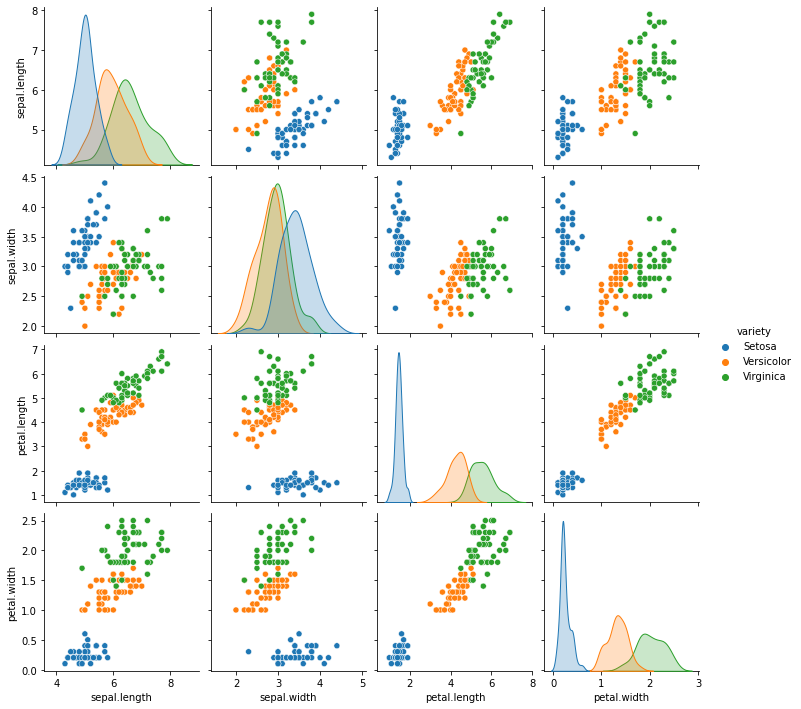

In [9]:
plt.figure(figsize=(15,10))
sns.pairplot(data=df, hue='variety')

In the above figure it is observed that:


1.   `petal.length` or `petal.width` can be used to classify the setosa uniquely
2.   `petal width/length` when plotted against `sepal width/length` it can help classify `Setosa` from `Versicolor/Virginica`




#### Correlation between features

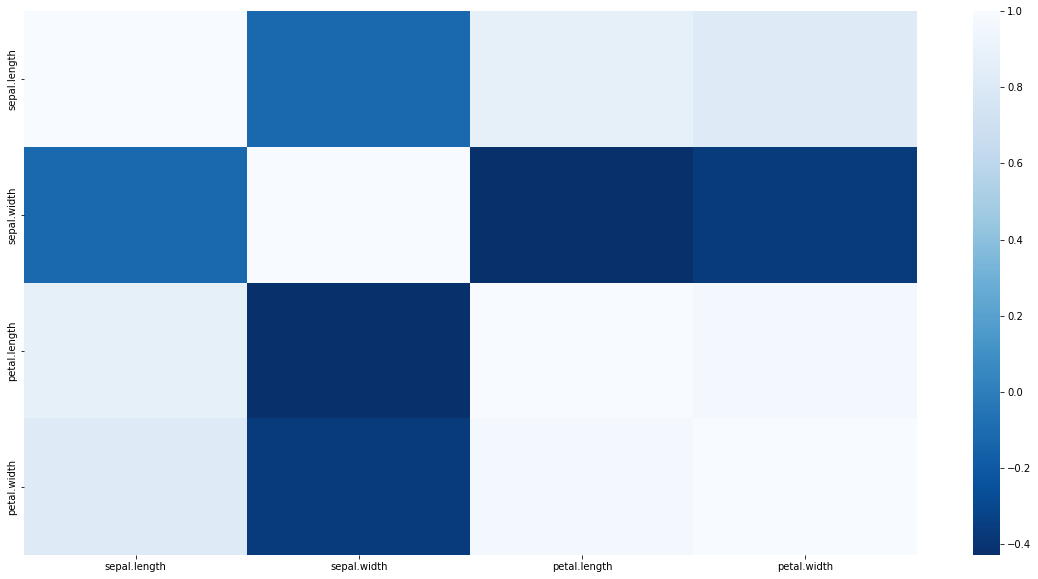

In [10]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(), cmap='Blues_r')

 Based on above figure we can deduce that:



1.   `sepal.length` has positive correlation with `petal.length` and `petal.width` and negative correlation with `sepal.width`. 
2.   `sepal.width` has negative correlation with all other features.
3. `petal.length` has negative correlation with `sepal.width` while having postive correlation with other features. 
4. `petal.width` has strong negative correlation with `sepal.width` while having positive correlation with other features 



# Label Encoding 

In [11]:
category_map = {'Setosa': 0, 'Versicolor': 1, 'Virginica': 2}
df['variety'] = df['variety'].map(category_map)

In [12]:
df.head(10)

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
6,4.6,3.4,1.4,0.3,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
9,4.9,3.1,1.5,0.1,0


In [13]:
df[51:60]

,sepal.length,sepal.width,petal.length,petal.width,variety
51,6.4,3.2,4.5,1.5,1
52,6.9,3.1,4.9,1.5,1
53,5.5,2.3,4.0,1.3,1
54,6.5,2.8,4.6,1.5,1
55,5.7,2.8,4.5,1.3,1
56,6.3,3.3,4.7,1.6,1
57,4.9,2.4,3.3,1.0,1
58,6.6,2.9,4.6,1.3,1
59,5.2,2.7,3.9,1.4,1


In [14]:
df.tail(10)

,sepal.length,sepal.width,petal.length,petal.width,variety
140,6.7,3.1,5.6,2.4,2
141,6.9,3.1,5.1,2.3,2
142,5.8,2.7,5.1,1.9,2
143,6.8,3.2,5.9,2.3,2
144,6.7,3.3,5.7,2.5,2
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2
149,5.9,3.0,5.1,1.8,2


# 80:10:10 split

> Contains the following:
1. Train, validation, test splitting
2. Five fold cross validation
3. Hyperparameter tuning, 
4. Model fitting 
5. Metrics calculation of models



## Splitting Data

In [15]:
# split train, validation and test into 80:10:10 ratio
features = df.drop('variety', axis=1)
target_label = df['variety']
x_train, x_test, y_train, y_test = train_test_split(features, target_label, test_size=0.2, random_state=42)
x_test, x_val, y_test, y_val = train_test_split(x_test, y_test, test_size=0.5, random_state=42)
print('training data samples:', len(y_train), f"({round(len(y_train)/len(target_label), 2) * 100}%)"  )
print('validation data samples:',len(y_val), f"({round(len(y_val)/len(target_label), 2) * 100}%)")
print('test data samples:', len(y_test), f"({round(len(y_test)/len(target_label), 2) * 100})")

training data samples: 120 (80.0%)
validation data samples: 15 (10.0%)
test data samples: 15 (10.0)


## Cross validation score

In [16]:
rf =  RandomForestClassifier()
print(rf, cross_val_score(rf, x_train, y_train, cv=5))

RandomForestClassifier() [0.95833333 0.95833333 0.875      1.         0.95833333]


In [17]:
lr =  LogisticRegression(max_iter=10000)
print(lr, cross_val_score(lr, x_train, y_train, cv=5))

LogisticRegression(max_iter=10000) [1.         1.         0.875      1.         0.95833333]


In [18]:
mlp =  MLPClassifier(max_iter=1000)
print(mlp, cross_val_score(mlp, x_train, y_train, cv=5))

MLPClassifier(max_iter=1000) [0.95833333 1.         0.875      1.         1.        ]


## Hyperparameter tuning

##### Random Forest Classifier tuning

In [19]:
def analyze_results(result):
  means = result.cv_results_['mean_test_score']
  stds = result.cv_results_['std_test_score']
  params = result.cv_results_['params']
  for mean, std, param in zip(means, stds, params):
    print(f"{mean} +/-{std} for {param} ")

rf =  RandomForestClassifier()
params = {
    "n_estimators" : [1, 5, 10, 50, 100],
    "max_depth": [ 10, 20, 50]
}
cv = GridSearchCV(rf, params, cv=5)
cv.fit(x_train, y_train.values.ravel())
analyze_results(cv)

print('\nbest', cv.best_estimator_, cv.best_score_, cv.best_params_)

0.9 +/-0.0565194165260439 for {'max_depth': 10, 'n_estimators': 1} 
0.95 +/-0.04082482904638631 for {'max_depth': 10, 'n_estimators': 5} 
0.9333333333333333 +/-0.07728015412913089 for {'max_depth': 10, 'n_estimators': 10} 
0.9333333333333333 +/-0.07264831572567791 for {'max_depth': 10, 'n_estimators': 50} 
0.95 +/-0.06123724356957944 for {'max_depth': 10, 'n_estimators': 100} 
0.9166666666666667 +/-0.05892556509887895 for {'max_depth': 20, 'n_estimators': 1} 
0.9416666666666668 +/-0.05651941652604389 for {'max_depth': 20, 'n_estimators': 5} 
0.9333333333333333 +/-0.049999999999999996 for {'max_depth': 20, 'n_estimators': 10} 
0.95 +/-0.06123724356957944 for {'max_depth': 20, 'n_estimators': 50} 
0.95 +/-0.06123724356957944 for {'max_depth': 20, 'n_estimators': 100} 
0.8916666666666668 +/-0.062360956446232345 for {'max_depth': 50, 'n_estimators': 1} 
0.9416666666666667 +/-0.07728015412913088 for {'max_depth': 50, 'n_estimators': 5} 
0.9416666666666668 +/-0.05651941652604389 for {'max_de

##### Logistic Regression tuning

In [20]:
# Logistic regression


def analyze_results(result):
  means = result.cv_results_['mean_test_score']
  stds = result.cv_results_['std_test_score']
  params = result.cv_results_['params']
  for mean, std, param in zip(means, stds, params):
    print(f"{mean} +/-{std} for {param} ")

lr =  LogisticRegression(max_iter=10000)
params = {
    "C" : [0.001, 0.01, 0.1, 1, 10, 100],
}
cv = GridSearchCV(lr, params, cv=5)
cv.fit(x_train, y_train.values.ravel())
analyze_results(cv)

print('\nbest', cv.best_estimator_, cv.best_score_, cv.best_params_)

0.8166666666666667 +/-0.10069204977995479 for {'C': 0.001} 
0.8583333333333334 +/-0.097182531580755 for {'C': 0.01} 
0.9333333333333333 +/-0.0565194165260439 for {'C': 0.1} 
0.9666666666666666 +/-0.0485912657903775 for {'C': 1} 
0.9416666666666667 +/-0.05651941652604389 for {'C': 10} 
0.95 +/-0.06123724356957944 for {'C': 100} 

best LogisticRegression(C=1, max_iter=10000) 0.9666666666666666 {'C': 1}


##### MLP hyperparameter tuning

In [51]:
# Multi-Layer Perceptron

def analyze_results(result):
  means = result.cv_results_['mean_test_score']
  stds = result.cv_results_['std_test_score']
  params = result.cv_results_['params']
  for mean, std, param in zip(means, stds, params):
    print(f"{mean} +/-{std} for {param} ")

mlp =  MLPClassifier(max_iter=10000)

params = {
    "activation" : ['identity','logistic', 'tanh','relu'],
    # "hidden_layer_sizes": [(10,), (50,), (100,) (200,)],
    "learning_rate": ['constant', 'invscaling', 'adaptive']
}

cv = GridSearchCV(mlp, params, cv=5)
cv.fit(x_train, y_train.values.ravel())
analyze_results(cv)

print('\nbest', cv.best_estimator_, cv.best_score_, cv.best_params_)

0.9555555555555555 +/-0.041573970964154924 for {'activation': 'identity', 'learning_rate': 'constant'} 
0.9555555555555555 +/-0.041573970964154924 for {'activation': 'identity', 'learning_rate': 'invscaling'} 
0.9555555555555555 +/-0.041573970964154924 for {'activation': 'identity', 'learning_rate': 'adaptive'} 
0.9555555555555555 +/-0.041573970964154924 for {'activation': 'logistic', 'learning_rate': 'constant'} 
0.9555555555555555 +/-0.041573970964154924 for {'activation': 'logistic', 'learning_rate': 'invscaling'} 
0.9555555555555555 +/-0.041573970964154924 for {'activation': 'logistic', 'learning_rate': 'adaptive'} 
0.9777777777777779 +/-0.04444444444444447 for {'activation': 'tanh', 'learning_rate': 'constant'} 
0.9555555555555555 +/-0.041573970964154924 for {'activation': 'tanh', 'learning_rate': 'invscaling'} 
0.9777777777777779 +/-0.04444444444444447 for {'activation': 'tanh', 'learning_rate': 'adaptive'} 
0.9444444444444444 +/-0.03513641844631534 for {'activation': 'relu', 'le

## Training models

In [22]:
rf1 = RandomForestClassifier(n_estimators=5, max_depth=10)
rf1.fit(x_train, y_train.values.ravel())

RandomForestClassifier(max_depth=10, n_estimators=5)

In [23]:
lr1 =  LogisticRegression(C=1, max_iter=1000)
lr1.fit(x_train, y_train.values.ravel())

LogisticRegression(C=1, max_iter=1000)

In [52]:
mlp1 = MLPClassifier(activation='tanh', learning_rate='constant', max_iter=1000)
mlp1.fit(x_train, y_train.values.ravel())

MLPClassifier(activation='tanh', max_iter=1000)

## Metrics calculation of models

In [25]:
def analyse_scores(model):
  start = time.time()
  y_val_pred = model.predict(x_val)
  end = time.time()
  print(f'''
    model: {model}
    accuracy_score: {accuracy_score(y_val, y_val_pred)}
    precision_score: {precision_score(y_val, y_val_pred, average='micro')} 
    recall_score: {recall_score(y_val, y_val_pred, average='micro')}
    latency: {(end-start)*1000}s
  ''')
  return confusion_matrix(y_val, y_val_pred)

### On validation data

##### Model 1 (Random forest)


    model: RandomForestClassifier(max_depth=10, n_estimators=5)
    accuracy_score: 1.0
    precision_score: 1.0 
    recall_score: 1.0
    latency: 3.622770309448242s
  


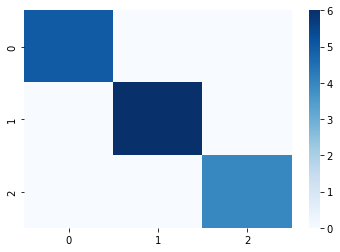

In [26]:
cm_rf = analyse_scores(rf1)
sns.heatmap(data=cm_rf, cmap='Blues')

##### Model 2 (Logistic Regression)


    model: LogisticRegression(C=1, max_iter=1000)
    accuracy_score: 1.0
    precision_score: 1.0 
    recall_score: 1.0
    latency: 1.9059181213378906s
  


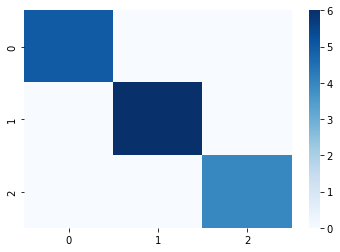

In [27]:
cm_lr = analyse_scores(lr1)
sns.heatmap(data=cm_lr, cmap='Blues')

##### Model 3 (Multi Layer Perceptron)


    model: MLPClassifier(activation='identity', max_iter=1000)
    accuracy_score: 1.0
    precision_score: 1.0 
    recall_score: 1.0
    latency: 2.038717269897461s
  


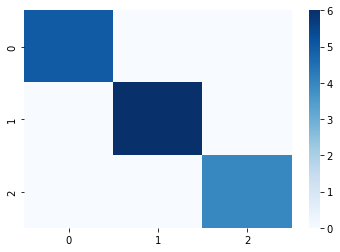

In [28]:
cm_mlp = analyse_scores(mlp1)
sns.heatmap(data=cm_mlp,  cmap='Blues')

### On testing data

In [29]:
def analyse_scores(model):
  start = time.time()
  y_test_pred = model.predict(x_test)
  end = time.time()
  print(f'''
    model: {model}
    accuracy_score: {accuracy_score(y_test, y_test_pred)}
    precision_score: {precision_score(y_test, y_test_pred, average='micro')} 
    recall_score: {recall_score(y_test, y_test_pred, average='micro')}
    latency: {(end-start)*1000}s
  ''')
  return confusion_matrix(y_test, y_test_pred)

##### Model 1 (Random Forest)


    model: RandomForestClassifier(max_depth=10, n_estimators=5)
    accuracy_score: 1.0
    precision_score: 1.0 
    recall_score: 1.0
    latency: 4.173755645751953s
  


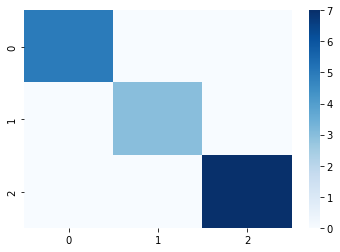

In [30]:
cm_rf = analyse_scores(rf1)
sns.heatmap(data=cm_rf, cmap='Blues')

##### Model 2 (Logistic Regression)


    model: LogisticRegression(C=1, max_iter=1000)
    accuracy_score: 1.0
    precision_score: 1.0 
    recall_score: 1.0
    latency: 1.3120174407958984s
  


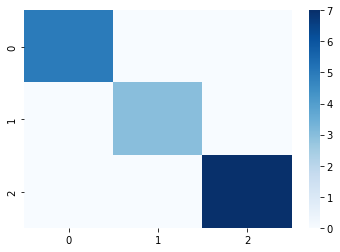

In [31]:
cm_lr = analyse_scores(lr1)
sns.heatmap(data=cm_lr, cmap='Blues')

##### Model 3 (Multi Layer Perceptron)


    model: MLPClassifier(activation='identity', max_iter=1000)
    accuracy_score: 1.0
    precision_score: 1.0 
    recall_score: 1.0
    latency: 1.7464160919189453s
  


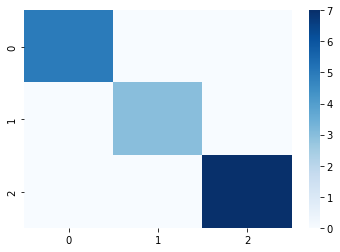

In [32]:
cm_mlp1 = analyse_scores(mlp1)
sns.heatmap(data=cm_mlp1, cmap='Blues')

# 60:20:20 split

> Contains the following:
1. Train, validation, test splitting
2. Five fold cross validation
3. Hyperparameter tuning, 
4. Model fitting 
5. Metrics calculation of models


## Splitting data


In [33]:
# split train, validation and test into 60:20:20 ratio
features = df.drop('variety', axis=1)
target_label = df['variety']
x_train, x_test, y_train, y_test = train_test_split(features, target_label, test_size=0.4, random_state=42)
x_test, x_val, y_test, y_val = train_test_split(x_test, y_test, test_size=0.5, random_state=42)
print('training data samples:', len(y_train), f"({round(len(y_train)/len(target_label), 2) * 100}%)"  )
print('validation data samples:',len(y_val), f"({round(len(y_val)/len(target_label), 2) * 100}%)")
print('test data samples:', len(y_test), f"({round(len(y_test)/len(target_label), 2) * 100})")

training data samples: 90 (60.0%)
validation data samples: 30 (20.0%)
test data samples: 30 (20.0)


## Five fold cross validation

In [34]:
rf =  RandomForestClassifier()
print(rf, cross_val_score(rf, x_train, y_train, cv=5))

RandomForestClassifier() [1.         0.72222222 1.         0.94444444 0.94444444]


In [35]:
lr =  LogisticRegression(max_iter=10000)
print(lr, cross_val_score(lr, x_train, y_train, cv=5))

LogisticRegression(max_iter=10000) [1.         0.77777778 1.         1.         0.94444444]


In [36]:
mlp =  MLPClassifier(max_iter=1000)
print(mlp, cross_val_score(mlp, x_train, y_train, cv=5))

MLPClassifier(max_iter=1000) [0.94444444 0.88888889 0.94444444 1.         1.        ]


## Hyperparameter Tuning of models

### Random Forest Classifier 

In [37]:
def analyze_results(result):
  means = result.cv_results_['mean_test_score']
  stds = result.cv_results_['std_test_score']
  params = result.cv_results_['params']
  for mean, std, param in zip(means, stds, params):
    print(f"{mean} +/-{std} for {param} ")

rf =  RandomForestClassifier()
params = {
    "n_estimators" : [1, 5, 10, 20, 50, 100],
    "max_depth": [1, 2, 5, 10, 20, 50, None]
}
cv = GridSearchCV(rf, params, cv=5)
cv.fit(x_train, y_train.values.ravel())
analyze_results(cv)

print('best', cv.best_estimator_, cv.best_score_, cv.best_params_)

0.6444444444444444 +/-0.056655772373253144 for {'max_depth': 1, 'n_estimators': 1} 
0.8 +/-0.16703662642636563 for {'max_depth': 1, 'n_estimators': 5} 
0.9111111111111112 +/-0.06666666666666665 for {'max_depth': 1, 'n_estimators': 10} 
0.8666666666666668 +/-0.10304020550550781 for {'max_depth': 1, 'n_estimators': 20} 
0.8777777777777779 +/-0.0816496580927726 for {'max_depth': 1, 'n_estimators': 50} 
0.9 +/-0.09558139185602918 for {'max_depth': 1, 'n_estimators': 100} 
0.8777777777777777 +/-0.08888888888888888 for {'max_depth': 2, 'n_estimators': 1} 
0.9111111111111111 +/-0.0753592220347252 for {'max_depth': 2, 'n_estimators': 5} 
0.888888888888889 +/-0.09296222517045283 for {'max_depth': 2, 'n_estimators': 10} 
0.9222222222222222 +/-0.08314794192830981 for {'max_depth': 2, 'n_estimators': 20} 
0.9 +/-0.09558139185602918 for {'max_depth': 2, 'n_estimators': 50} 
0.9333333333333333 +/-0.10772621905369621 for {'max_depth': 2, 'n_estimators': 100} 
0.8666666666666666 +/-0.10304020550550781

### Logisic Regression

In [38]:
# Logistic regression

def analyze_results(result):
  means = result.cv_results_['mean_test_score']
  stds = result.cv_results_['std_test_score']
  params = result.cv_results_['params']
  for mean, std, param in zip(means, stds, params):
    print(f"{mean} +/-{std} for {param} ")

lr =  LogisticRegression(max_iter=10000)
params = {
    "C" : [0.001, 0.01, 0.1, 1, 10, 100],
}
cv = GridSearchCV(lr, params, cv=5)
cv.fit(x_train, y_train.values.ravel())
analyze_results(cv)

print('best', cv.best_estimator_, cv.best_score_, cv.best_params_)

0.6222222222222222 +/-0.16629588385661961 for {'C': 0.001} 
0.8333333333333334 +/-0.09938079899999065 for {'C': 0.01} 
0.9111111111111111 +/-0.08314794192830981 for {'C': 0.1} 
0.9444444444444444 +/-0.08606629658238703 for {'C': 1} 
0.9444444444444444 +/-0.06085806194501844 for {'C': 10} 
0.9444444444444444 +/-0.08606629658238703 for {'C': 100} 
best LogisticRegression(C=1, max_iter=10000) 0.9444444444444444 {'C': 1}


### Multi Layer Perceptron

In [39]:
# Multi-Layer Perceptron

def analyze_results(result):
  means = result.cv_results_['mean_test_score']
  stds = result.cv_results_['std_test_score']
  params = result.cv_results_['params']
  for mean, std, param in zip(means, stds, params):
    print(f"{mean} +/-{std} for {param} ")

mlp =  MLPClassifier(max_iter=10000)

params = {
    "activation" : ['identity','logistic', 'tanh','relu'],
    "learning_rate": ['constant', 'invscaling', 'adaptive']
}

cv = GridSearchCV(mlp, params, cv=5)
cv.fit(x_train, y_train.values.ravel())
analyze_results(cv)

print('best', cv.best_estimator_, cv.best_score_, cv.best_params_)

0.9555555555555555 +/-0.041573970964154924 for {'activation': 'identity', 'learning_rate': 'constant'} 
0.9555555555555555 +/-0.041573970964154924 for {'activation': 'identity', 'learning_rate': 'invscaling'} 
0.9555555555555555 +/-0.041573970964154924 for {'activation': 'identity', 'learning_rate': 'adaptive'} 
0.9555555555555555 +/-0.041573970964154924 for {'activation': 'logistic', 'learning_rate': 'constant'} 
0.9555555555555555 +/-0.041573970964154924 for {'activation': 'logistic', 'learning_rate': 'invscaling'} 
0.9555555555555555 +/-0.041573970964154924 for {'activation': 'logistic', 'learning_rate': 'adaptive'} 
0.9555555555555555 +/-0.041573970964154924 for {'activation': 'tanh', 'learning_rate': 'constant'} 
0.9666666666666666 +/-0.04444444444444447 for {'activation': 'tanh', 'learning_rate': 'invscaling'} 
0.9666666666666666 +/-0.04444444444444447 for {'activation': 'tanh', 'learning_rate': 'adaptive'} 
0.9444444444444444 +/-0.03513641844631534 for {'activation': 'relu', 'le

## Fit the models

In [53]:
rf1 = RandomForestClassifier(n_estimators=100, max_depth=2)
rf1.fit(x_train, y_train.values.ravel())

RandomForestClassifier(max_depth=2)

In [41]:
lr1 =  LogisticRegression(C=1, max_iter=1000)
lr1.fit(x_train, y_train.values.ravel())

LogisticRegression(C=1, max_iter=1000)

In [54]:
mlp1 = MLPClassifier(activation='tanh', learning_rate='invscaling', max_iter=1000)
mlp1.fit(x_train, y_train.values.ravel())

MLPClassifier(activation='tanh', learning_rate='invscaling', max_iter=1000)

## Metrics calculation

### Validation data

In [43]:
def analyse_scores(model):
  start = time.time()
  y_val_pred = model.predict(x_val)
  end = time.time()
  print(f'''
    model: {model}
    accuracy_score: {accuracy_score(y_val, y_val_pred)}
    precision_score: {precision_score(y_val, y_val_pred, average='micro')} 
    recall_score: {recall_score(y_val, y_val_pred, average='micro')}
    latency: {(end-start)*1000}s
  ''')
  return(confusion_matrix(y_val, y_val_pred))


##### Model 1 (Random Forest)


    model: RandomForestClassifier(max_depth=5)
    accuracy_score: 0.9666666666666667
    precision_score: 0.9666666666666667 
    recall_score: 0.9666666666666667
    latency: 16.173124313354492s
  


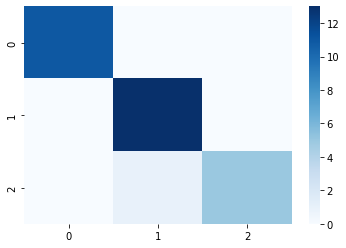

In [44]:
cm_rf = analyse_scores(rf1)
sns.heatmap(data=cm_rf, cmap='Blues')

##### Model 2 (Logistic Regression)


    model: LogisticRegression(C=1, max_iter=1000)
    accuracy_score: 1.0
    precision_score: 1.0 
    recall_score: 1.0
    latency: 1.8396377563476562s
  


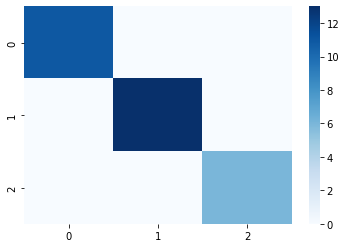

In [45]:
cm_lr = analyse_scores(lr1)
sns.heatmap(data=cm_lr, cmap='Blues')

##### Model 3 (Multi Layer Perceptron)


    model: MLPClassifier(activation='tanh', learning_rate='adaptive', max_iter=1000)
    accuracy_score: 0.9666666666666667
    precision_score: 0.9666666666666667 
    recall_score: 0.9666666666666667
    latency: 2.2742748260498047s
  


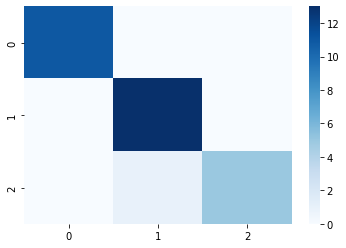

In [46]:
cm_mlp1 = analyse_scores(mlp1)
sns.heatmap(data=cm_mlp1, cmap='Blues')

### Testing data

In [47]:
def analyse_scores(model):
  start = time.time()
  y_test_pred = model.predict(x_test)
  start = time.time()
  end = time.time()
  print(f'''
    model: {model}
    accuracy_score: {accuracy_score(y_test, y_test_pred)}
    precision_score: {precision_score(y_test, y_test_pred, average='micro')} 
    recall_score: {recall_score(y_test, y_test_pred, average='micro')}
    latency: {(end-start)*1000}s
  ''')
  return confusion_matrix(y_test, y_test_pred)

##### Model 1 (Random Forest)


    model: RandomForestClassifier(max_depth=5)
    accuracy_score: 1.0
    precision_score: 1.0 
    recall_score: 1.0
    latency: 0.0002384185791015625s
  


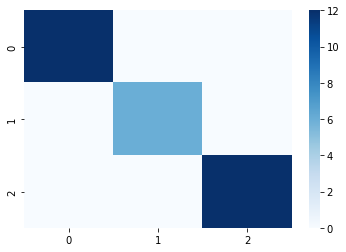

In [48]:
cm_rf = analyse_scores(rf1)
sns.heatmap(data=cm_rf, cmap='Blues')

##### Model 2 (Logistic Regression)


    model: LogisticRegression(C=1, max_iter=1000)
    accuracy_score: 1.0
    precision_score: 1.0 
    recall_score: 1.0
    latency: 0.000476837158203125s
  


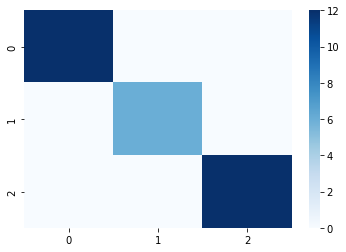

In [49]:
cm_lr = analyse_scores(lr1)
sns.heatmap(data=cm_lr, cmap='Blues')

##### Model 3 (Multi Layer Perceptron)


    model: MLPClassifier(activation='tanh', learning_rate='adaptive', max_iter=1000)
    accuracy_score: 1.0
    precision_score: 1.0 
    recall_score: 1.0
    latency: 0.000476837158203125s
  


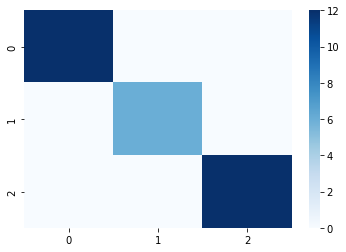

In [50]:
cm_mlp1 = analyse_scores(mlp1)
sns.heatmap(data=cm_mlp1, cmap='Blues')

# Analysis on results

It is observed that **80:10:10** split gives a better accuracy than **60:10:10**.  The possible reason behind this could be that as the dataset has a very small amount of data, training with a higher percentage of samples allows the model to make better predictions as the more the training data the better the results of the model.
<br /> <br />
Overall, all the models performed pretty well asupported by the metrics mainly because the dataset is small and data is distributed well.  <br /> <br />
However, one thing to make note of is that Random Forest took the most amount of time to predict the values and it was pretty slow as compared to the other models. <br /><br />
As seen in the heat map generated from the confusion matrix of each prediction, there are very less errors and model is able to predict accurately. 

> 
80:10:10 split
---
  - Since it is a relatively small dataset with the features having a similar pattern as Gaussian distribution, all classification models are able to able to predict the data accurately.   
   

60:20:20 split
---


  -   It is observed that all models are able to predict the data with complete accuracy for testing data.
  -  For validation data, LogisticRegression is able to predict the values with full accuracy(100%) whereas other 2 models (Random Forest and MLPClassifier) give ~96% accuracy. 
  
   